In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import time
import yfinance as yf

In [60]:
df = pd.read_csv("infy.csv")

In [61]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,220.824997,222.324997,217.781250,218.356247,164.314651,2001624
1,2008-01-02,218.750000,219.918747,214.050003,218.537506,164.451065,6155056
2,2008-01-03,224.625000,224.625000,211.250000,213.631256,160.759064,12425960
3,2008-01-04,218.425003,218.425003,210.000000,211.862503,159.428085,6166320
4,2008-01-07,208.750000,211.250000,202.875000,204.606247,153.967712,13254200


In [62]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3366,2021-09-13,1683.000000,1701.500000,1675.199951,1691.900024,1691.900024,4662374
3367,2021-09-14,1695.949951,1695.949951,1678.599976,1686.150024,1686.150024,4945167
3368,2021-09-15,1693.250000,1715.099976,1690.199951,1711.449951,1711.449951,4062344
3369,2021-09-16,1715.199951,1719.250000,1691.449951,1702.250000,1702.250000,3246568
3370,2021-09-17,1697.000000,1718.000000,1684.449951,1691.300049,1691.300049,7454864


In [63]:
df= df[["Close"]].copy()

In [64]:
df

,Close
0,218.356247
1,218.537506
2,213.631256
3,211.862503
4,204.606247
...,...
3366,1691.900024
3367,1686.150024
3368,1711.449951
3369,1702.250000


In [65]:
df.describe()

,Close
count,3371.000000
mean,517.568689
std,295.694185
min,137.787506
25%,331.696869
50%,463.325012
75%,602.837494
max,1741.650024


In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
result =adfuller(df.Close.dropna())
print(f"ADF statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic: 3.183467062005621
p-value: 1.0


In [68]:
from statsmodels.graphics.tsaplots import plot_acf

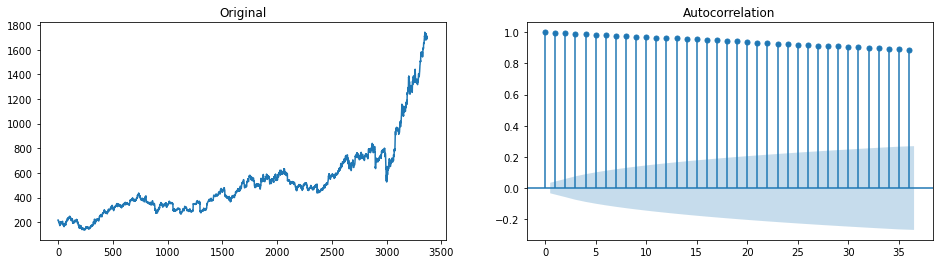

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

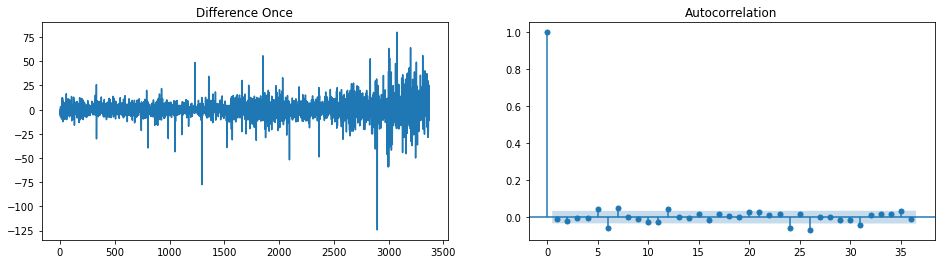

In [70]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);


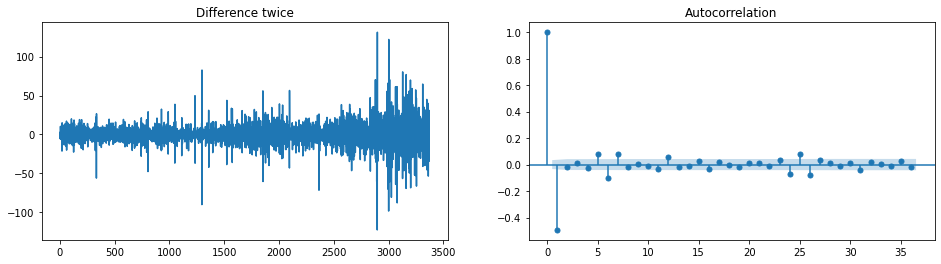

In [71]:
diff = df.Close.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);


In [72]:
from pmdarima.arima.utils import ndiffs

In [73]:
ndiffs(df.Close, test="adf")

1

1 is the value of d.

In [74]:
from statsmodels.graphics.tsaplots import plot_pacf

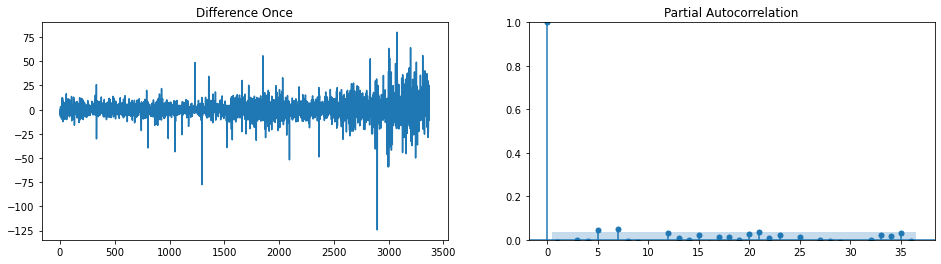

In [75]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);


from above right side graph we can see 5th line have highest height. so p value is 5

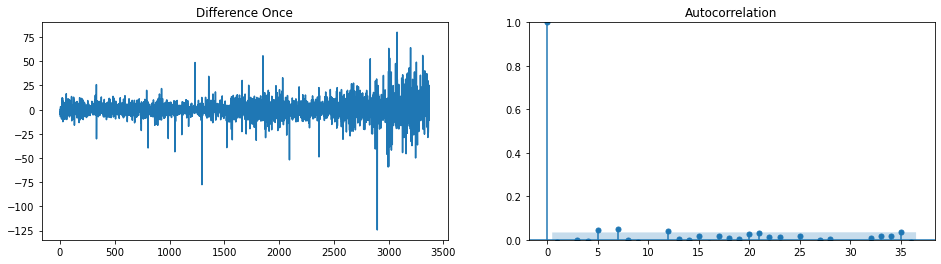

In [76]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

13 can be suitable for the q value becuse of havinig medium height in graph.

p, q, d = 5, 13, 1

Fitting in arima model


In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(df.Close, order=(5,1,13))
result = model.fit(disp=1)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
print(result.summary())

In [ ]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density= True)

In [ ]:
result.plot_predict(
    start=1,
    end=60,
    dynamic=False,
);